In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifpar10
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']

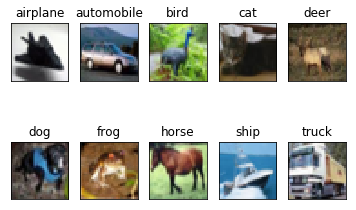

In [3]:
fig = plt.figure()
for i in range(10):
	ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
	idx = np.where(train_labels[:]==i)[0]
	features_idx = train_features[idx[0],:,:,:]
	ax.set_title(LABELS[i])
	plt.imshow(features_idx)
plt.show()


# PCA + LDA 

In [85]:
N = 10000
M = 1000
CLASSES = 10
INPUT_FEATURES = 32*32*3
PCA_Features = 32

In [86]:
X = train_features[0:N,...].reshape((N,INPUT_FEATURES))/255.0
Y = train_labels[0:N]
X_val = train_features[N:N+M,...].reshape((M,INPUT_FEATURES))/255.0
Y_val = train_labels[N:N+M]
X_test = test_features.reshape((test_features.shape[0],INPUT_FEATURES))/255.0
Y_test = test_labels

In [87]:
pca = PCA(n_components=PCA_Features)
pca.fit(X)
X_pca = pca.transform(X)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [88]:
# Divide into 45 classes
train_data = []
for i in range(CLASSES):
    for j in range(i+1,CLASSES):
        class_train = (i,j)
        idx = np.hstack((np.where(Y==i)[0] , np.where(Y==j)[0]))        
        mid = np.sum(Y==i)
        high = idx.shape[0]   
        
        sub_x = np.zeros((high,PCA_Features))
        sub_y = np.zeros_like(idx)
        
        sub_x = X_pca[idx,...]
        sub_y[mid:high] = 1
        
        train_data.append({'X':sub_x,'Y':sub_y,'classes':class_train})

In [89]:
lda_train = []
for bin_class in train_data:
    
    lda = LDA(n_components=1,solver='svd')
    lda.fit(bin_class['X'],bin_class['Y'])
    bin_class['LDA'] = lda

In [90]:
prediction = []
for bin_class in train_data:
    pred = bin_class['LDA'].predict(X_val)
    class_pred = np.zeros_like(pred)
    class_pred[np.where(pred==0)] = bin_class['classes'][0]
    class_pred[np.where(pred==1)] = bin_class['classes'][1]
    prediction.append(class_pred)
prediction = np.array(prediction)
class_prediction = []
for i in range(M):
    counts = np.bincount(prediction[:,i])
    class_prediction.append(np.argmax(counts))
class_prediction = np.array(class_prediction)

In [92]:
print("Accuracy:",np.sum(class_prediction == Y_val[:,0])/M) 

Accuracy: 0.367


In [115]:
prediction = []
for bin_class in train_data:
    pred = bin_class['LDA'].predict(X_test)
    class_pred = np.zeros_like(pred)
    class_pred[np.where(pred==0)] = bin_class['classes'][0]
    class_pred[np.where(pred==1)] = bin_class['classes'][1]
    prediction.append(class_pred)
prediction = np.array(prediction)
class_prediction = []
for i in range(10000):
    counts = np.bincount(prediction[:,i])
    class_prediction.append(np.argmax(counts))
class_prediction = np.array(class_prediction)

In [117]:
print("Accuracy:",np.sum(class_prediction == Y_test[:,0])/10000) 

Accuracy: 0.3701


# Only LDA

In [123]:
N = 100
M = 10
CLASSES = 10
INPUT_FEATURES = 32*32*3
PCA_Features = 512

In [132]:
X = train_features[0:N,...].reshape((N,INPUT_FEATURES))/255.0
Y = train_labels[0:N]
X_val = train_features[N:N+M,...].reshape((M,INPUT_FEATURES))/255.0
Y_val = train_labels[N:N+M]
X_test = test_features.reshape((test_features.shape[0],INPUT_FEATURES))/255.0
Y_test = test_labels

In [125]:
X_pca = X

In [126]:
# Divide into 45 classes
train_data = []
for i in range(CLASSES):
    for j in range(i+1,CLASSES):
        class_train = (i,j)
        idx = np.hstack((np.where(Y==i)[0] , np.where(Y==j)[0]))        
        mid = np.sum(Y==i)
        high = idx.shape[0]   
        
        sub_x = np.zeros((high,PCA_Features))
        sub_y = np.zeros_like(idx)
        
        sub_x = X_pca[idx,...]
        sub_y[mid:high] = 1
        
        train_data.append({'X':sub_x,'Y':sub_y,'classes':class_train})        

In [127]:
lda_train = []
for bin_class in train_data:    
    lda = LDA(n_components=1,solver='svd')
    lda.fit(bin_class['X'],bin_class['Y'])
    bin_class['LDA'] = lda

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [128]:
prediction = []
for bin_class in train_data:
    pred = bin_class['LDA'].predict(X_val)
    class_pred = np.zeros_like(pred)
    class_pred[np.where(pred==0)] = bin_class['classes'][0]
    class_pred[np.where(pred==1)] = bin_class['classes'][1]
    prediction.append(class_pred)
prediction = np.array(prediction)

In [129]:
class_prediction = []
for i in range(M):
    counts = np.bincount(prediction[:,i])
    class_prediction.append(np.argmax(counts))
class_prediction = np.array(class_prediction)

In [139]:
print("Accuracy:",np.sum(class_prediction == Y_val[:,0])/M) 

Accuracy: 0.23


In [133]:
prediction = []
for bin_class in train_data:
    pred = bin_class['LDA'].predict(X_test)
    class_pred = np.zeros_like(pred)
    class_pred[np.where(pred==0)] = bin_class['classes'][0]
    class_pred[np.where(pred==1)] = bin_class['classes'][1]
    prediction.append(class_pred)
prediction = np.array(prediction)
class_prediction = []
for i in range(10000):
    counts = np.bincount(prediction[:,i])
    class_prediction.append(np.argmax(counts))
class_prediction = np.array(class_prediction)

In [138]:
print("Accuracy:",np.sum(class_prediction == Y_test[:,0])/10000) 

Accuracy: 0.1743


# Reasons for low accracy: 
1. Very less data. Due to the time required to train the model on cpu I could only train on 1000 images
2. High Numbers of parameters W = 45*(D*2) D = 32 - 3072

# Write Ups 
### PCA + LDA: 
#### Val Acc:36% Test Acc: 37% 
    Reducing the dimensions reduces the amount of inforation but requires less computation time hence I could train it on the whole dataset
                
### Only LDA:
#### Val Acc: 23% Test Acc: 17%
    Better than PCA + LDA but not enough time to run on the whole dataset

### PCA + Linear Classifier: 
#### Val Acc: 35% Test Acc: 34%
    Second best classifier even in 32 eigen vectors
    
### Linear Classifier: 
#### Val Acc: 20% Test Acc: 10%
    Worst classifier, unable to understand the data and can't predict

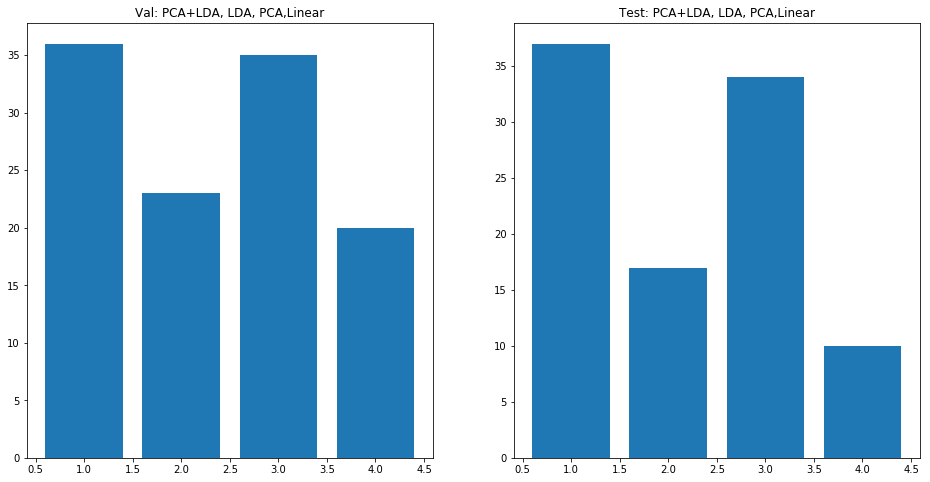

In [235]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1)
ax.bar([1,2,3,4],[36,23,35,20])
ax.set_title("Val: PCA+LDA, LDA, PCA,Linear")
ax = fig.add_subplot(1,2,2)
ax.bar([1,2,3,4],[37,17,34,10])
ax.set_title("Test: PCA+LDA, LDA, PCA,Linear")
plt.show()

# Linear Classifer

In [149]:
X = train_features[0:N,...].reshape((N,INPUT_FEATURES))/255.0
Y = train_labels[0:N]
X_val = train_features[N:N+M,...].reshape((M,INPUT_FEATURES))/255.0
Y_val = train_labels[N:N+M]
X_test = test_features.reshape((test_features.shape[0],INPUT_FEATURES))/255.0
Y_test = test_labels

In [150]:
# Divide into 45 classes
train_data = []
for i in range(CLASSES):
    for j in range(i+1,CLASSES):
        class_train = (i,j)
        idx = np.hstack((np.where(Y==i)[0] , np.where(Y==j)[0]))        
        mid = np.sum(Y==i)
        high = idx.shape[0]   
        
        sub_x = np.zeros((high,PCA_Features))
        sub_y = np.zeros_like(idx)
        
        sub_x = X_pca[idx,...]
        sub_y[mid:high] = 1
        
        train_data.append({'X':sub_x,'Y':sub_y,'classes':class_train})  

In [218]:
def sigmoid(X):
    return 1./(1. + np.exp(-X))

def LinearClassifier(X,Y):
    W = np.random.random((X.shape[1],))
    
    lr = 1e-3
    prev_loss = 1.0
    for i in range(100):
        Z1 = X.dot(W)
        Y_pred = sigmoid(Z1)
        Loss = np.sum((Y -Y_pred)**2)
        if np.abs(Loss - prev_loss) < 1e-3:
            break
        prev_loss = Loss
        dL = -1*(Y-Y_pred)*Y_pred*(1-Y_pred)
        dw = X.T.dot(dL)
        W -= lr*dw
        
    return W
    
def predict(X,W):
    return sigmoid(X.dot(W))

In [220]:
for bin_class in train_data:    
    bin_class['W'] = LinearClassifier(bin_class['X'],bin_class['Y'])


In [221]:
prediction = []
for bin_class in train_data:
    pred = predict(X_test, bin_class['W'])
    class_pred = np.zeros_like(pred)
    class_pred[np.where(pred<=0.5)] = bin_class['classes'][0]
    class_pred[np.where(pred>0.5)] = bin_class['classes'][1]
    prediction.append(class_pred.astype('int'))
prediction = np.array(prediction)
class_prediction = []
for i in range(10000):
    counts = np.bincount(prediction[:,i])
    class_prediction.append(np.argmax(counts))
class_prediction = np.array(class_prediction)

In [222]:
print("Accuracy:",np.sum(class_prediction == Y_test[:,0])/10000) 

Accuracy: 0.3514


In [223]:
prediction = []
for bin_class in train_data:
    pred = predict(X_val, bin_class['W'])
    class_pred = np.zeros_like(pred)
    class_pred[np.where(pred<=0.5)] = bin_class['classes'][0]
    class_pred[np.where(pred>0.5)] = bin_class['classes'][1]
    prediction.append(class_pred.astype('int'))
prediction = np.array(prediction)
class_prediction = []
for i in range(M):
    counts = np.bincount(prediction[:,i])
    class_prediction.append(np.argmax(counts))
class_prediction = np.array(class_prediction)

In [224]:
print("Accuracy:",np.sum(class_prediction == Y_val[:,0])/M) 

Accuracy: 0.352


# PCA + Linear Classification

In [203]:
N = 10000
M = 1000
CLASSES = 10
INPUT_FEATURES = 32*32*3
PCA_Features = 32

X = train_features[0:N,...].reshape((N,INPUT_FEATURES))/255.0
Y = train_labels[0:N]
X_val = train_features[N:N+M,...].reshape((M,INPUT_FEATURES))/255.0
Y_val = train_labels[N:N+M]
X_test = test_features.reshape((test_features.shape[0],INPUT_FEATURES))/255.0
Y_test = test_labels

pca = PCA(n_components=PCA_Features)
pca.fit(X)
X_pca = pca.transform(X)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

# Divide into 45 classes
train_data = []
for i in range(CLASSES):
    for j in range(i+1,CLASSES):
        class_train = (i,j)
        idx = np.hstack((np.where(Y==i)[0] , np.where(Y==j)[0]))        
        mid = np.sum(Y==i)
        high = idx.shape[0]   
        
        sub_x = np.zeros((high,PCA_Features))
        sub_y = np.zeros_like(idx)
        
        sub_x = X_pca[idx,...]
        sub_y[mid:high] = 1
        
        train_data.append({'X':sub_x,'Y':sub_y,'classes':class_train})

In [226]:
for bin_class in train_data:    
    bin_class['W'] = LinearClassifier(bin_class['X'],bin_class['Y'])


In [227]:
prediction = []
for bin_class in train_data:
    pred = predict(X_test, bin_class['W'])
    class_pred = np.zeros_like(pred)
    class_pred[np.where(pred<=0.5)] = bin_class['classes'][0]
    class_pred[np.where(pred>0.5)] = bin_class['classes'][1]
    prediction.append(class_pred.astype('int'))
prediction = np.array(prediction)
class_prediction = []
for i in range(10000):
    counts = np.bincount(prediction[:,i])
    class_prediction.append(np.argmax(counts))
class_prediction = np.array(class_prediction)

print("Accuracy:",np.sum(class_prediction == Y_test[:,0])/10000) 

prediction = []
for bin_class in train_data:
    pred = predict(X_val, bin_class['W'])
    class_pred = np.zeros_like(pred)
    class_pred[np.where(pred<=0.5)] = bin_class['classes'][0]
    class_pred[np.where(pred>0.5)] = bin_class['classes'][1]
    prediction.append(class_pred.astype('int'))
prediction = np.array(prediction)
class_prediction = []
for i in range(M):
    counts = np.bincount(prediction[:,i])
    class_prediction.append(np.argmax(counts))
class_prediction = np.array(class_prediction)

print("Accuracy:",np.sum(class_prediction == Y_val[:,0])/M) 

Accuracy: 0.3487
Accuracy: 0.351
